In [1]:
import random
import numpy as np
np.random.seed(43)

In [2]:
x_values = np.random.rand(100,1) * 2
test_x_values = np.random.rand(5,1) * 2

In [3]:
# Equation for y = 4+3x + Noise

y_values = 4 + 3*(x_values) + np.random.randn(100,1)
test_y_values = 4 + 3*(test_x_values) + np.random.randn(5,1)

In [4]:
def mean_squared_error(slope,intercept,x_values,y_values):
    MSE = 0 # Mean Squared error
    n = len(x_values)

    for xi,yi in zip(x_values,y_values):
        y_pred = (slope * xi) + (intercept)
        y_actual = yi
        error = y_pred - y_actual
        MSE += error **2
    return MSE / n

In [5]:
def gradient_descent(learning_rate,x_values,y_values,slope,intercept):
    n = len(x_values)

    for i in range(1000):
        gradient_wrt_intercept = 0
        gradient_wrt_slope = 0

        if i % 50 == 0:
            print(f'Mean squared Error is -> {mean_squared_error(slope,intercept,x_values,y_values)}')

        for xi,yi in zip(x_values,y_values):
            gradient_wrt_intercept += (slope * xi + intercept - yi)
            gradient_wrt_slope += ((slope * xi + intercept - yi) * xi)
        gradient_wrt_intercept += (2/n) * gradient_wrt_intercept
        gradient_wrt_slope += (2/n) * gradient_wrt_slope
        intercept_step_size = gradient_wrt_intercept * learning_rate
        slope_step_size = gradient_wrt_slope * learning_rate

        intercept -= intercept_step_size
        slope -= slope_step_size

    return slope,intercept

In [6]:
# Picking Up values for the Parameters

slope = 0
intercept = 0
learning_rate = 0.001
epochs = 1000

predicted_slope,predicted_intercept = gradient_descent(learning_rate,x_values,y_values,slope,intercept)

Mean squared Error is -> [55.5599796]
Mean squared Error is -> [1.02741627]
Mean squared Error is -> [1.00285474]
Mean squared Error is -> [0.99760748]
Mean squared Error is -> [0.99648647]
Mean squared Error is -> [0.99624698]
Mean squared Error is -> [0.99619581]
Mean squared Error is -> [0.99618488]
Mean squared Error is -> [0.99618255]
Mean squared Error is -> [0.99618205]
Mean squared Error is -> [0.99618194]
Mean squared Error is -> [0.99618192]
Mean squared Error is -> [0.99618191]
Mean squared Error is -> [0.99618191]
Mean squared Error is -> [0.99618191]
Mean squared Error is -> [0.99618191]
Mean squared Error is -> [0.99618191]
Mean squared Error is -> [0.99618191]
Mean squared Error is -> [0.99618191]
Mean squared Error is -> [0.99618191]


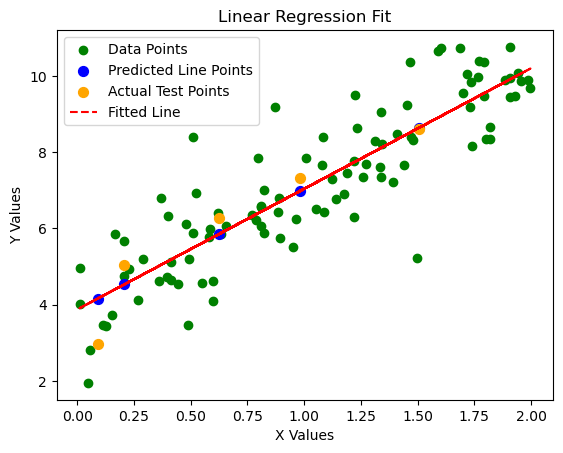

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x_values,y_values,color = 'green',label = 'Data Points')
predicted_points = [(predicted_slope * xi + predicted_intercept) for xi in x_values]

test_predicted_y_values = [(predicted_slope * xi + predicted_intercept) for xi in test_x_values]
plt.scatter(test_x_values,test_predicted_y_values,color = 'blue',label = 'Predicted Line Points',s = 50)
plt.scatter(test_x_values,test_y_values,color = 'Orange',label = 'Actual Test Points',s = 50)



plt.plot(x_values,predicted_points,color = 'red',label = 'Fitted Line',linestyle = 'dashed')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()